### Exercise 42

In [ ]:
# Define the variables
var('a b c l')

# Fixed diagonal length
d0 = 10

# Volume expression
V = a * b * c

# Constraint: diagonal equals d0
constraint = sqrt(a^2 + b^2 + c^2) == d0

# Lagrange multiplier method
# We maximize V under the constraint, so we form the Lagrangian:
# L = V - l*(sqrt(a^2 + b^2 + c^2) - d0)
# But it's easier to work with the squared constraint to avoid the square root
lagrangian = a*b*c - l*(a^2 + b^2 + c^2 - d0^2)

# Compute partial derivatives
eq1 = diff(lagrangian, a) == 0
eq2 = diff(lagrangian, b) == 0
eq3 = diff(lagrangian, c) == 0
eq4 = a^2 + b^2 + c^2 == d0^2  # The constraint

# Solve the system of equations
solution = solve([eq1, eq2, eq3, eq4], a, b, c, l, solution_dict=True)

# Filter real positive solutions (since lengths are positive)
valid_solutions = [sol for sol in solution if 
                  all(x > 0 for x in [sol[a], sol[b], sol[c]])]

# Display the solutions
for sol in valid_solutions:
    print(f"a = {sol[a].n()}, b = {sol[b].n()}, c = {sol[c].n()}")
    print(f"Volume = {(sol[a]*sol[b]*sol[c]).n()}")
    print(f"Diagonal = {sqrt(sol[a]^2 + sol[b]^2 + sol[c]^2).n()}")
    print()

In [2]:
# Define the variables for the rectangular parallelepiped
var('a b c')

# Define the volume and area expressions
V = a * b * c  # Volume
A = a * b + 2 * a * c + 2 * b * c  # Area without the top face

# Define the fixed volume (500)
V0 = 500

# Set the volume constraint
constraint_volume = V == V0

# Minimize the area subject to the volume constraint
Lagrange_multiplier = var('l')
lagrange_eq_area = A - l * (V - V0)

# Solve the Lagrange multiplier equations
solution_min_area = solve([diff(lagrange_eq_area, a), diff(lagrange_eq_area, b), diff(lagrange_eq_area, c)], a, b, c)

# Output the solution for the dimensions that minimize the area
solution_min_area

[[a == 0, b == 0, c == 0], [a == 4/l, b == 4/l, c == 2/l]]

### Exercise 43

In [ ]:
# Define the variables for the rectangular parallelepiped
var('x y z l')

# Define the volume and the constraint equations
V = 8 * x * y * z  # Volume of the parallelepiped
constraint = 16 * x^2 + 4 * y^2 + 9 * z^2 - 144  # Ellipsoid constraint

# Lagrange multiplier method: L = V - lambda * constraint
lagrange_eq = V - l * constraint

# Solve the Lagrange multiplier equations
solution = solve([diff(lagrange_eq, x), diff(lagrange_eq, y), diff(lagrange_eq, z)], x, y, z)

# Output the solution for the dimensions that maximize the volume
solution

### Exercise 44

In [ ]:
# Define the variables for the problem
var('x y z l')

# Define the distance squared function (d^2 = x^2 + y^2 + z^2)
distance_squared = x^2 + y^2 + z^2

# Define the plane equation constraint (2x - y + 2z = 16)
plane_constraint = 2*x - y + 2*z - 16

# Lagrange multiplier method
lagrange_eq_plane = distance_squared - l * plane_constraint

# Solve the Lagrange multiplier equations
solution_plane = solve([diff(lagrange_eq_plane, x), diff(lagrange_eq_plane, y), diff(lagrange_eq_plane, z)], x, y, z)

# Output the solution for the closest points in the plane
solution_plane

In [ ]:
# Define the variables for the surface problem
var('x y z l')

# Define the distance squared function (d^2 = x^2 + y^2 + z^2)
distance_squared_surface = x^2 + y^2 + z^2

# Define the surface equation constraint (z^2 - xy = 1)
surface_constraint = z^2 - x * y - 1

# Lagrange multiplier method
lagrange_eq_surface = distance_squared_surface - l * surface_constraint

# Solve the Lagrange multiplier equations
solution_surface = solve([diff(lagrange_eq_surface, x), diff(lagrange_eq_surface, y), diff(lagrange_eq_surface, z)], x, y, z)

# Output the solution for the closest points on the surface
solution_surface

### Exercise 45

In [ ]:
# Define the temperature function
T(x, y) = 100 / (x^2 + y^2 - 2*x - 2*y + 6)

# (a) Temperature at the origin and isotherm
T_origin = T(0, 0)
print(f"(a) Temperature at origin: {T_origin.n()}")

# Gradient (thermal flux direction)
grad_T = [diff(T, x), diff(T, y)]
print(f"Gradient at origin: {[grad_T[0].subs(x=0, y=0).n(), grad_T[1].subs(x=0, y=0).n()]}")

# Isotherm through origin (T(x,y) = T(0,0))
isotherm = x^2 + y^2 - 2*x - 2*y == 0
print(f"Isotherm through origin: {isotherm}")

# (b) Hottest point (minimize denominator)
D(x, y) = x^2 + y^2 - 2*x - 2*y + 6
critical_points = solve([diff(D, x) == 0, diff(D, y) == 0], [x, y])
hottest_point = critical_points[0]
hottest_temp = T(hottest_point[0].rhs(), hottest_point[1].rhs())
print(f"(b) Hottest point: {hottest_point}, Temperature: {hottest_temp.n()}")

# (c) Extrema in the disc x² + y² ≤ 1
# Parameterize boundary: x = cos(θ), y = sin(θ)
var('theta')
D_boundary = D(cos(theta), sin(theta)).simplify_full()
# Find extrema of D_boundary
critical_theta = solve(diff(D_boundary, theta) == 0, theta)
# Evaluate at critical points and endpoints
candidates = [0, pi/4, pi, 5*pi/4, 2*pi]
D_values = [D_boundary.subs(theta=theta_val) for theta_val in candidates]
T_values = [100 / D_val for D_val in D_values]

max_T = max(T_values)
min_T = min(T_values)
print(f"(c) Highest temperature in disc: {max_T.n()} at theta = {pi/4.n()}")
print(f"Lowest temperature in disc: {min_T.n()} at theta = {5*pi/4.n()}")

### Exercise 46

In [ ]:
# Define the function
f(x,y) = x^3 - x + y^2 - y + 2 * x * y
p = (1, 1, 2)

# Compute partial derivatives
fx = diff(f(x,y), x)
fy = diff(f(x,y), y)

# Evaluate at (1, 1)
f_val = f(p[0], p[1]) # z = f(x,y)
fx_val = fx.subs(x=p[0], y=p[1])
fy_val = fy.subs(x=p[0], y=p[1])

# Tangent plane equation
tangent_plane = f_val + fx_val*(x - 1) + fy_val*(y - 1)
print("(a) Tangent plane at (1, 1, 2):")
print("z =", tangent_plane)

In [ ]:
# Compute gradient at (1, -1)
grad_f = vector([diff(f(x,y), x), diff(f(x,y), y)])
grad_at_point = grad_f.subs(x=1, y=-1)

# Direction of steepest decrease
steepest_decrease = -grad_at_point
print("(b) Direction of steepest decrease at (1, -1):")
print(steepest_decrease)

In [ ]:
# Find critical points (solve fx = 0, fy = 0)
critical_points = solve([fx == 0, fy == 0], [x, y], solution_dict=True)
print(critical_points)

# Compute Hessian matrix
H = matrix([[diff(f, x, 2), diff(f, x, y)], 
            [diff(f, y, x), diff(f, y, 2)]])
print(H)
# Classify each critical point
for point in critical_points:
    x_val = point[x]
    y_val = point[y]
    H_val = H.subs(x=x_val, y=y_val)
    D = H_val.det()  # Determinant
    fxx = H_val[0, 0]  # f_xx
    
    print(f"\nCritical point at ({x_val}, {y_val}):")
    print("Hessian matrix:", H_val)
    
    if D > 0 and fxx > 0:
        print("Type: Local minimum")
    elif D > 0 and fxx < 0:
        print("Type: Local maximum")
    elif D < 0:
        print("Type: Saddle point")
    else:
        print("Type: Degenerate (further analysis needed)")

### Exercise 47

In [ ]:
f(x, y) = -x^3 - y^3 + (3/2)*x^2 + 3*y^2
grad_f = [diff(f, x), diff(f, y)]
critical_points = solve([grad_f[0] == 0, grad_f[1] == 0], [x, y], solution_dict=True)

H = matrix([[diff(f, x, 2), diff(f, x, y)], [diff(f, y, x), diff(f, y, 2)]])
for point in critical_points:
    x_val, y_val = point[x], point[y]
    H_val = H.subs(x=x_val, y=y_val)
    D = H_val.det()
    fxx = H_val[0, 0]
    print(f"Point ({x_val}, {y_val}):")
    print(f"Hessian: {H_val}")
    if D > 0 and fxx > 0:
        print("Type: Local minimum")
    elif D > 0 and fxx < 0:
        print("Type: Local maximum")
    elif D < 0:
        print("Type: Saddle point")
    else:
        print("Type: Degenerate")

In [ ]:
var('lam')
g = x^2 + y^2 - 1
L = f - lam * g
grad_L = [diff(L, x), diff(L, y), diff(L, lam)]
solutions = solve([eq == 0 for eq in grad_L], [x, y, lam], solution_dict=True)

boundary_points = []
for sol in solutions:
    x_val, y_val = sol[x], sol[y]
    if x_val^2 + y_val^2 == 1:  # Ensure it's on the circle
        boundary_points.append((x_val, y_val))

f_values = [f(point[0], point[1]) for point in boundary_points]
print("Max on circle:", max(f_values))
print("Min on circle:", min(f_values))

In [ ]:
# Critical point inside disc
f_interior = f(0, 0)

# Compare with boundary extrema
absolute_max = max(f_values + [f_interior])
absolute_min = min(f_values + [f_interior])
print("Absolute max in disc:", absolute_max)
print("Absolute min in disc:", absolute_min)

### Exercise 48

In [ ]:
# a)
var('x, y')
f = x*y*exp(x*y)
integral(integral(f, y, 0, 1), x, 0, 1) # 1

In [ ]:
# b)
f = x*log(y)
integral(integral(f, y, 1, 2), x, -1, 0)

### Exercise 49

In [ ]:
# a)
f = (x*y)^2 * cos(x)
integral(integral(f, x, 0, pi/2), y, 0, 1)

In [ ]:
# b)
# Define variables
var('x y')

# Define bounds for y as functions of x
y_lower = -x + 3
y_upper = x + 3

# Compute area A of the triangle
area = integral(integral(1, y, y_lower, y_upper), x, 0, 3)

# Compute integral of x over region T
Mx = integral(integral(x, y, y_lower, y_upper), x, 0, 3)

# Compute integral of y over region T
My = integral(integral(y, y, y_lower, y_upper), x, 0, 3)

# Compute center of mass coordinates
x_bar = Mx / area
y_bar = My / area

# Display results
print("Area of the triangle:", area)
print("Center of mass:", (x_bar, y_bar))

### Exercise 50

In [ ]:
# a)
var('r theta')
integrand = r^2 * r # x^2 + y^2 becomes r^2, and dx dy = r dr dtheta
integral = integral(integrand, r, 0, 1)
integral.integrate(theta, 0, 2*pi) # pi/2

In [ ]:
# b)
var('x y')
integrand = x^3 * y
inner_integral = integrate(integrand, x, y^2-4,0)
integrate(inner_integral,y,-2,2) # 0 since the function is odd with respect to y 

In [ ]:
# c)
var('y')

lower_bound_x = - sqrt(1-y^2)
upper_bound_x = sqrt(1-y^2)

integrand = x^2 * y

inner = integrate(integrand, x, lower_bound_x, upper_bound_x)
integrate(inner, y, 0, 1/2)

### Exercise 51

65/6


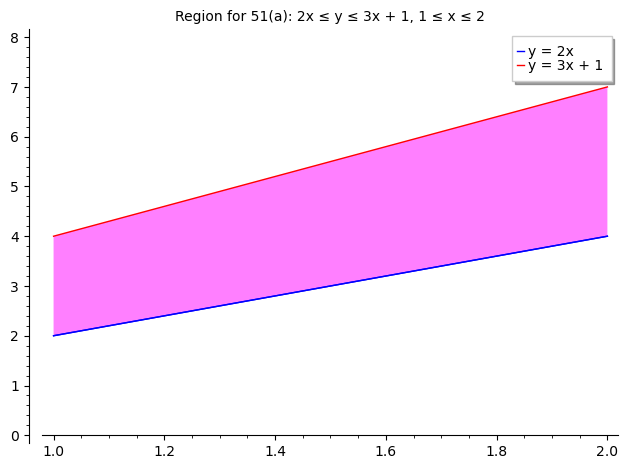

In [23]:
var('x y')
print(integrate(integrate(y, y, 2*x, 3*x+1), x, 1, 2)) # 65/6

# Define the lines
lower = plot(2*x, (x, 1, 2), color='blue', legend_label='y = 2x')
upper = plot(3*x + 1, (x, 1, 2), color='red', legend_label='y = 3x + 1')

# Shade the region between the lines
region = plot(lambda x: 2*x, (x, 1, 2), fill=lambda x: 3*x + 1, fillcolor='magenta')

# Combine plots
show(lower + upper + region, ymin=0, ymax=8, title="Region for 51(a): 2x ≤ y ≤ 3x + 1, 1 ≤ x ≤ 2")

1/70


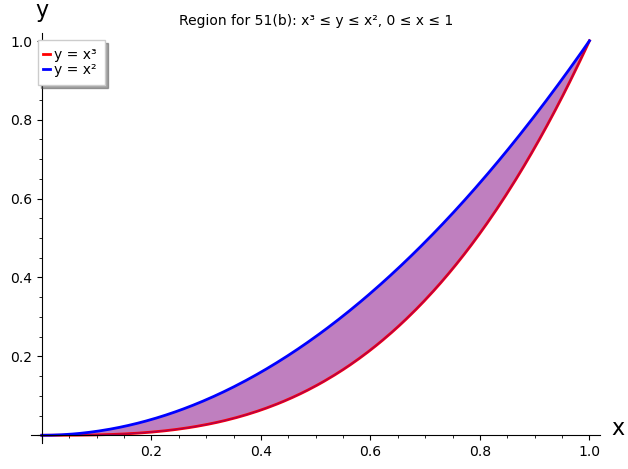

In [6]:
var('x y')
print(integrate(integrate(y^2, y, x^3, x^2), x, 0, 1)) # 1/70

# Define the curves
lower_curve = plot(x^3, (x, 0, 1), color='red', legend_label='y = x³', thickness=2)
upper_curve = plot(x^2, (x, 0, 1), color='blue', legend_label='y = x²', thickness=2)

# Shade the region between y=x³ and y=x²
region = plot(lambda x: x^3, (x, 0, 1), fill=lambda x: x^2, fillcolor='purple', alpha=0.3)

# Combine plots
(lower_curve + upper_curve + region).show(
    ymin=0, ymax=1,
    title="Region for 51(b): x³ ≤ y ≤ x², 0 ≤ x ≤ 1",
    axes_labels=['x', 'y']
)

1/6


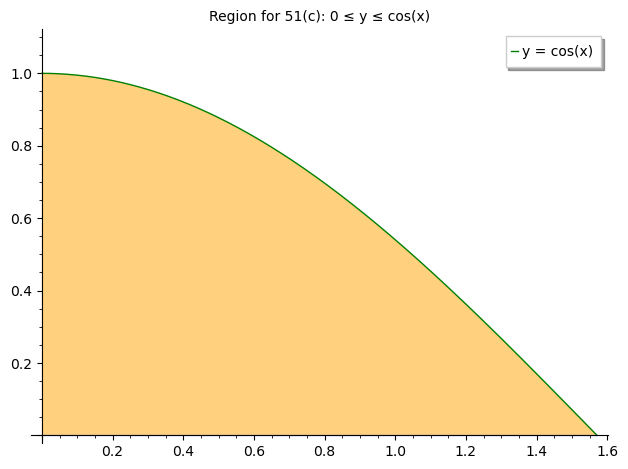

In [10]:
x, y = var('x y')
print(integral(integral(y*sin(x), y, 0, cos(x)), x, 0, pi/2))

# Plot the region
curve_c = plot(cos(x), (x, 0, pi/2), color='green', legend_label='y = cos(x)')
region_c = plot(lambda x: 0, (x, 0, pi/2), fill=cos(x), fillcolor='orange', alpha=0.3)
(curve_c + region_c).show(ymin=0, ymax=1.1, title="Region for 51(c): 0 ≤ y ≤ cos(x)") 

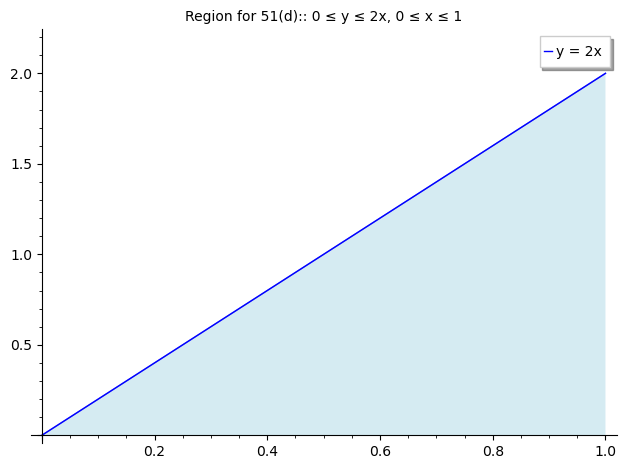

In [22]:
var('x y')
integral(integral(exp(x^2), y, 0, 2*x), x, 0, 1)

# Plot the region
curve = plot(2*x, (x, 0, 1), color='blue', legend_label='y = 2x')
region = plot(2*x, (x, 0, 1), fill=0, fillcolor='lightblue', alpha=0.5)
(curve + region).show(ymin=0, ymax=2.2, title="Region for 51(d):: 0 ≤ y ≤ 2x, 0 ≤ x ≤ 1")

### Exercise 52

In [29]:
x, y = var('x y')

# Check Fubini's theorem
print(integral(integral(x*exp(y), x, 0, 2), y, 0, 1))
print(integral(integral(x*exp(y), y, 0, 1), x, 0, 2))

2*e - 2
2*e - 2


In [33]:
print(integral(integral(exp(x^2), x, y/2, 1), y, 0, 2))

lower_bound_y = 0 # since y >= 0
upper_bound_y = 2*x # since x = y/2

upper_bound_x = 1 # since x <= 1
lower_bound_x = 0 # from y ∈ [0,2]

print(integral(integral(exp(x^2), y, lower_bound_y, upper_bound_y), x, lower_bound_x, upper_bound_x))

e - 1
e - 1


In [ ]:
x, y = var('x y')

print(integral(integral(sin(y^7), y, x^(1/6), 1), x, 0, 1))

lower_bound_x = 0 # from x >= 0
upper_bound_x = y^6 # since y = x^(1/6)

lower_bound_y = 0 # from x ∈ [0,1] 
upper_bound_y = 1 # since y <= 1

print(integral(integral(sin(y^7), x, lower_bound_x, upper_bound_x), y, lower_bound_y, upper_bound_y))

In [ ]:
x, y = var('x y')

# Opción 1: Integral original (dx dy)
integral(integral(sin(y^7), y, x^(1/6), 1), x, 0, 1)

# Opción 2: Integral invertida (dy dx)
integral(integral(sin(y^7), x, 0, y^6), y, 0, 1)

### Exercise 59

In [21]:
# Logarithmic Spiral Length Calculator
# γ(t) = (a*e^(b*t)*cos(t), a*e^(b*t)*sin(t)), b < 0

# Define variables
a, b, t = var('a b t')

# Parametric equations
x = a * exp(b * t) * cos(t)
y = a * exp(b * t) * sin(t)

# Compute derivatives
dx_dt = diff(x, t)
dy_dt = diff(y, t)

# Compute and simplify integrand
integrand = sqrt(dx_dt^2 + dy_dt^2).simplify_full()
print(f"Arc length integrand:\n{integrand}\n")

# General solution
print("General solution:")
if b < 0:  # Check convergence condition
    L = integral(integrand, t, 0, oo)
    print(f"L = {L}  (valid for b < 0)")
    print("Which simplifies to:")
    print(f"L = {a*sqrt(b^2 + 1)/abs(b)}")
else:
    print("Integral only converges when b < 0")

# Example calculation
print("\nExample calculation:")
a_val = 1.0
b_val = -0.1
if b_val < 0:
    L_example = integral(integrand.subs(a=a_val, b=b_val), t, 0, oo)
    print(f"For a = {a_val}, b = {b_val}:")
    print(f"Exact length: {L_example}")
    print(f"Numerical value: {L_example.n(digits=10)}")
else:
    print(f"Error: b = {b_val} must be negative for convergence")

Arc length integrand:
sqrt(a^2*b^2 + a^2)*e^(b*t)

General solution:
Integral only converges when b < 0

Example calculation:
For a = 1.00000000000000, b = -0.100000000000000:
Exact length: 10.04987562112089
Numerical value: 10.04987562


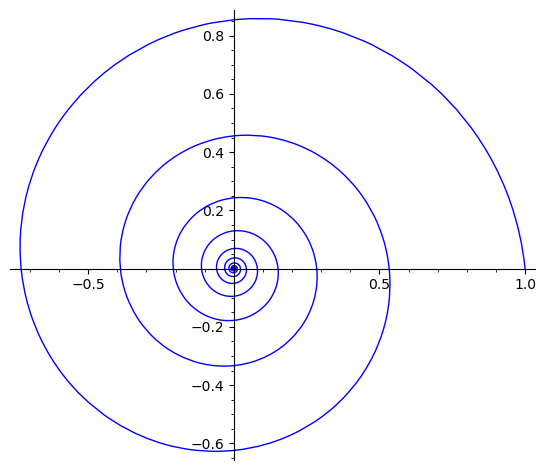

In [65]:
# Define the parameters
a = 1       # Scale factor (a > 0)
b = -0.1    # Decay rate (b < 0)

# Define the parametric equations
t = var('t')
x = a * exp(b * t) * cos(t)
y = a * exp(b * t) * sin(t)

# Plot the spiral for t in [0, 20π] (adjust as needed)
parametric_plot((x, y), (t, 0, 20*pi), aspect_ratio=1, plot_points=1000)

In [72]:
var('t a b')
assume(b < 0)  # Ensure convergence
r(t) = (a * exp(b * t) * cos(t), a * exp(b * t) * sin(t))
dr = diff(r(t), t)
s(t) = sqrt(dr[0]^2 + dr[1]^2)  # speed
length = integral(s(t), t, 0, oo)  # oo is infinity
length

-sqrt(b^2 + 1)*a/b

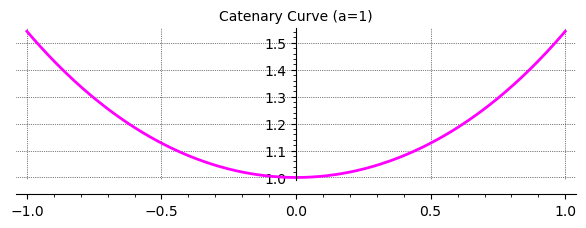

In [79]:
# First declare the symbolic variables
x = var('x')
a = var('a')

# Define the catenary function
def catenary(x, a):
    return (a/2) * (exp(x/a) + exp(-x/a))

# Set specific parameter value
a_value = 1  # You can change this to any positive value

# Create the plot
catenary_plot = plot(catenary(x, a_value), 
                    (x, -a_value, a_value),
                    aspect_ratio=1,
                    color='magenta',
                    thickness=2,
                    title=f'Catenary Curve (a={a_value})',
                    gridlines=True,
                    figsize=6)

# Show the plot
catenary_plot.show()

In [82]:
var('x a')
assume(a > 0)
y(x) = ((a/2) * (exp(x/a) + exp(-x/a)))
dy = diff(y(x), x)

integrand = sqrt(1+dy^2)
length = integral(integrand, x, -a, a)
length

a*(e^2 - 1)*e^(-1)

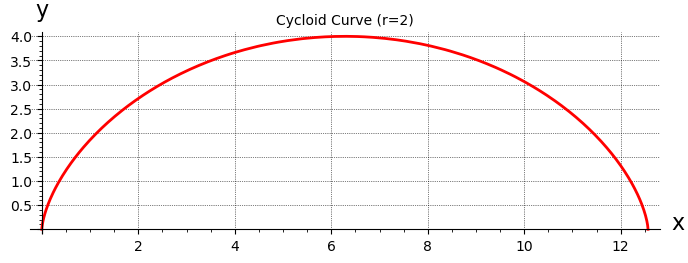

In [28]:
# Define symbolic variables
t = var('t')
r = var('r')

# Define cycloid parametric equations
def cycloid_x(t, r):
    return r*t - r*sin(t)

def cycloid_y(t, r):
    return r - r*cos(t)

# Set parameter value
r_value = 2  # Can be any positive number

# Create the plot
cycloid_plot = parametric_plot((cycloid_x(t, r_value), cycloid_y(t, r_value)), 
                             (t, 0, 2*pi),
                             aspect_ratio=1,
                             color='red',
                             thickness=2,
                             title=f'Cycloid Curve (r={r_value})',
                             axes_labels=['x', 'y'],
                             gridlines=True,
                             plot_points=200,
                             figsize=7)

# Show the plot
cycloid_plot.show()

Length of a curve

In [2]:
var('t')
r(t) = (4*t, 3*cos(t), 3*sin(t))
parametric_plot3d(r(t), (t,-5,5))

Graphics3d Object

In [3]:
dr = diff(r(t), t)
s(t) = sqrt((dr[0]^2+dr[1]^2+dr[2]^2))
length = integral(s(t), t, -5, 5)
length

50

In [14]:
var('t')
r(t) = (2*sin(t)-t*cos(t), 2*t, 2*cos(t)+t*sin(t))
parametric_plot3d(r(t), (t,0,sqrt(5)))

Graphics3d Object

In [15]:
dr = diff(r(t), t)
s(t) = sqrt((dr[0]^2+dr[1]^2+dr[2]^2))
print(s(t).simplify_trig())
length = integral(s(t), t, 0, sqrt(5))
length

sqrt(t^2 + 5)


5/2*sqrt(2) + 5/2*arcsinh(1)

In [27]:
var('t')
r(t) = (exp(2*t), 2*sqrt(2), exp(-2*t))
parametric_plot3d(r(t), (t,0,ln(2)))

Graphics3d Object

In [28]:
dr = diff(r(t), t)
s(t) = sqrt((dr[0]^2+dr[1]^2+dr[2]^2))
length = integral(s(t), t, 0, ln(2))
length

2*integrate(sqrt(e^(8*t) + 1)*e^(-2*t), t, 0, log(2))

In [33]:
var('t')
x(t) = t
y(t) = 2
z(t) = ln(t)
dx(t) = diff(x(t), t)
dy(t) = diff(y(t), t)
dz(t) = diff(z(t), t)
s(t) = sqrt(dx(t)^2+dy(t)^2+dz(t)^2)
length = integral(s(t), t, 1, sqrt(3))
show(length)
r(t) = (t, 2, ln(t))
parametric_plot3d(r(t), (t,1, sqrt(3)))

-sqrt(2) - 1/2*log(3) + 1/2*log(sqrt(2) + 1) - 1/2*log(sqrt(2) - 1) + 2

Graphics3d Object

In [53]:
var('t')
r(t) = (3*t^2, t^3, 5)
parametric_plot3d(r(t), (t, -1, 0))

Graphics3d Object

In [54]:
dr = diff(r(t), t)
s(t) = sqrt((dr[0]^2+dr[1]^2+dr[2]^2))
length = integral(s(t), t, 0, 1)
length

5*sqrt(5) - 8

In [57]:
var('t')
r(t) = (2-5*t, 4*t, -(1+3*t))
parametric_plot3d(r(t), (t,0,5))

Graphics3d Object

In [58]:
dr = diff(r(t), t)
ds(t) = sqrt((dr[0]^2+dr[1]^2+dr[2]^2))
length = integral(ds(t), t, 0, t)
length

5*sqrt(2)*t

In [59]:
r.subs(t=s/(5*sqrt(2)))

t |--> (-3/2*sqrt(2)*sqrt(t^4 + 4*t^2) + 2, 6/5*sqrt(2)*sqrt(t^4 + 4*t^2), -9/10*sqrt(2)*sqrt(t^4 + 4*t^2) - 1)

In [7]:
# Define the curve
a = 1
t = var('t')
gamma_x = t
gamma_y = a * arcsin(t/a)
gamma_z = (a/4) * log((a+t)/(a-t))

parametric_plot3d((gamma_x, gamma_y, gamma_z), (t, -0.99, 0.99), color="blue")

Graphics3d Object

In [15]:
a = 1
t = var('t')
norm_gamma_prime = 1 + a^2 / (2*(a^2-t^2))
L = integral(norm_gamma_prime, t, -0.9, 0.9)
print("Arc length:", L.numerical_approx())

Arc length: 3.27221948958322


In [45]:
# Define parameters
n = 2 # Number of helix revolutions
t = var('t')

# Plot path
helix = parametric_plot3d((cos(2*pi*t), sin(2*pi*t), t), (t, 0, n), color='purple', thickness=3)
helix.show(aspect_ratio=[1,1,1])

Graphics3d Object

In [49]:
var('u v')
K = sqrt(0.84)
G = (0.4*((K*cosh(0.4*u))^2 + (0.4*sin(K*v))^2))
f_x = (2*K*cosh(0.4*u)*(-(K*cos(v)*cos(K*v)) - sin(v)*sin(K*v)))/G
f_y = (2*K*cosh(0.4*u)*(-(K*sin(v)*cos(K*v)) +2 cos(v)*sin(K*v)))/G
f_z = -u + (2*0.84*cosh(0.4*u)*sinh(0.4*u))/G
parametric_plot3d([f_x, f_y, f_z], (u,-13.2,13.2), (v,-37.4,37.4), plot_points=[90,90], color='green')

Graphics3d Object

In [10]:
t = var('t')
s = var('s')
var('x y z')

x_t = e^t - e^(-t) + 1
y_t = e^t + e^(-t) - 1
z_t = 3*e^t + e^(-t) + 1

P = vector([x_t.subs(t=0), y_t.subs(t=0), z_t.subs(t=0)])

dx = diff(x_t, t).subs(t=0)
dy = diff(y_t, t).subs(t=0)
dz = diff(z_t, t).subs(t=0)
v = vector([dx, dy, dz])

curve = parametric_plot3d((x_t, y_t, z_t), (t, -2, 2), color='blue', thickness=2)
tangent_line = parametric_plot3d(P + s * v, (s, -2, 2), color='red', thickness=2)
point = point3d(P, color='black', size=30)

# Add the normal plane x + z = 6
normal_plane = implicit_plot3d(x + z == 6, (x, -2, 4), (y, -2, 4), (z, 2, 10), color='orange', opacity=0.5)

show(curve + tangent_line + point + normal_plane, aspect_ratio=1)

Graphics3d Object

In [22]:
v1 = vector([1,1,1])
v2 = vector([-1,-1,4])

vec1 = arrow3d((0,0,0), v1, color='red', width=0.5, label='v1 = (1,1,1)')
vec2 = arrow3d((0,0,0), v2, color='blue', width=0.5, label='v2 = (-1,-1,4)')

plot = vec1 + vec2

plot.show(aspect_ratio=[1,1,1], axes_labels=['x', 'y', 'z'])

Graphics3d Object

In [24]:
print(2*sqrt(3).n())
print(3*sqrt(2).n())

3.46410161513775
4.24264068711929


In [ ]:
2z^2 - xy = c
2 + 1 = c
c = 3

1(x-1) - 1(y+1) + 4(z-1) = 0
x-1-y-1+4z-4=0
x-y+4z = 6
